# Feature Selection Fiter

## Sélection de l'état mort

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [91]:
data = pd.read_csv(r"Data1_ImmuweanBIS.csv")
data.fillna(0, inplace=True)
del data['ID']
del data['ID_litter']
del data['group']
del data['IgGJ2']
del data['Age_D1']
del data['AgeD2']
del data['Min1inflcr']
del data['Size']
del data['sex']
data.head()

,litt_size,TPI,Died,Diarr,hospit,InfCroissPed,InfCroiss4,InfCroiss5,InfCroiss6,InfCroiss7,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,5,0.0,1,1,1,1,1,0,0,0.0,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,39.0
1,5,0.0,0,1,0,1,1,0,0,0.0,...,38.2,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3
2,5,0.0,0,0,0,1,0,1,0,0.0,...,38.5,38.2,38.4,38.1,38.8,39.1,37.4,38.0,38.2,37.6
3,5,0.0,0,1,1,1,0,1,0,0.0,...,37.8,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,38.0
4,5,0.0,0,1,1,1,0,1,0,0.0,...,38.3,38.3,38.7,38.6,39.1,37.4,37.4,37.4,37.4,37.4


In [92]:
data.shape

(167, 47)

In [93]:
train_x, test_x, train_y, test_y= train_test_split(data.drop("Died",axis=1),data.Died,test_size=0.2,random_state=41)

In [94]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)

#Fit and transforming on train data
data_constant = constant_filter.fit_transform(train_x)
print(data_constant.shape)

#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in train_x.columns
                    if column not in train_x.columns[constant_filter.get_support()]]

#No. of constant columns
print(len(constant_columns))

#Constant columns names:
for column in constant_columns:
    print(column)

(133, 46)
0


In [95]:
data_cons = data.drop(constant_columns,axis=1)
data_cons.shape

(167, 47)

In [96]:
qcons_filter = VarianceThreshold(threshold=0.01)

#Fit and transforming on train data
data_qcons = qcons_filter.fit_transform(train_x)
print(data_qcons.shape)

#Extracting all Quasi constant columns using get support function of our filter
qcons_columns = [column for column in train_x.columns
                    if column not in train_x.columns[qcons_filter.get_support()]]

#No. of Quasi constant columns
print(len(qcons_columns))

#Quasi Constant columns names:
for column in qcons_columns:
    print(column)

(133, 46)
0


In [97]:
data_qcons = data.drop(qcons_columns,axis=1)
data_qcons.shape

(167, 47)

In [98]:
data_qcons_t = data_qcons.T
data_qcons_t.shape

(47, 167)

In [99]:
print(data_qcons_t.duplicated().sum())

0


In [143]:
data = pd.read_csv(r"DataM.csv")
data.fillna(0, inplace=True)
del data['ID']
del data['ID_litter']
del data['group']
del data['IgGJ2']
del data['Age_D1']
del data['AgeD2']
del data['Min1inflcr']
del data['Size']
del data['sex']
data.columns

Index(['litt_size', 'TPI', 'Diarr', 'hospit', 'InfCroissPed', 'InfCroiss4',
       'InfCroiss5', 'InfCroiss6', 'InfCroiss7', 'InfCroiss8', 'TRD21',
       'TRD22', 'TRD23', 'TRD24', 'TRD25', 'TRD26', 'TRD27', 'TRD28', 'TRD29',
       'TRD30', 'TRD31', 'TRD32', 'TRD33', 'TRD34', 'TRD35', 'TRD36', 'TRD37',
       'TRD38', 'TRD39', 'TRD40', 'TRD41', 'TRD42', 'TRD43', 'TRD44', 'TRD45',
       'TRD46', 'TRD47', 'TRD48', 'TRD49', 'TRD50', 'TRD51', 'TRD52', 'TRD53',
       'TRD54', 'TRD55', 'TRD56', 'Died'],
      dtype='object')

In [144]:
data.shape

(167, 47)

In [145]:
X = data.iloc[:,0:46]
Y = data['Died']
X.head()

,litt_size,TPI,Diarr,hospit,InfCroissPed,InfCroiss4,InfCroiss5,InfCroiss6,InfCroiss7,InfCroiss8,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,5,0.0,1,1,1,1,0,0,0.0,0.0,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,39.0
1,5,0.0,1,0,1,1,0,0,0.0,0.0,...,38.2,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3
2,5,0.0,0,0,1,0,1,0,0.0,0.0,...,38.5,38.2,38.4,38.1,38.8,39.1,37.4,38.0,38.2,37.6
3,5,0.0,1,1,1,0,1,0,0.0,0.0,...,37.8,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,38.0
4,5,0.0,1,1,1,0,1,0,0.0,1.0,...,38.3,38.3,38.7,38.6,39.1,37.4,37.4,37.4,37.4,37.4


In [146]:
Y.head()

0    1
1    0
2    0
3    0
4    0
Name: Died, dtype: int64

In [147]:
full_data= X.copy()
full_data["Died"]= Y
print(full_data.head(2))

   litt_size  TPI  Diarr  hospit  InfCroissPed  InfCroiss4  InfCroiss5  \
0          5  0.0      1       1             1           1           0   
1          5  0.0      1       0             1           1           0   

   InfCroiss6  InfCroiss7  InfCroiss8  ...  TRD48  TRD49  TRD50  TRD51  TRD52  \
0           0         0.0         0.0  ...   38.4   38.2   38.4   38.9   38.7   
1           0         0.0         0.0  ...   38.4   37.4   37.8   39.1   38.1   

   TRD53  TRD54  TRD55  TRD56  Died  
0   38.5   38.7   39.0   39.0     1  
1   38.7   37.7   37.9   38.3     0  

[2 rows x 47 columns]


In [148]:
imp = full_data.drop("Died", axis=1).apply(lambda x: x.corr(full_data.Died))
print(imp)
indices = np.argsort(imp)
print(indices)
print(imp[indices])

litt_size       0.034996
TPI            -0.023028
Diarr           0.359767
hospit          0.391818
InfCroissPed    0.030264
InfCroiss4     -0.005787
InfCroiss5     -0.093896
InfCroiss6      0.042083
InfCroiss7      0.111759
InfCroiss8     -0.061794
TRD21          -0.019375
TRD22           0.002900
TRD23           0.040678
TRD24           0.029736
TRD25           0.029311
TRD26           0.089496
TRD27          -0.036343
TRD28          -0.009238
TRD29          -0.006421
TRD30           0.056015
TRD31           0.091213
TRD32           0.077008
TRD33           0.039368
TRD34           0.046230
TRD35           0.171240
TRD36          -0.067047
TRD37           0.125113
TRD38           0.122085
TRD39           0.140891
TRD40           0.140582
TRD41          -0.005177
TRD42           0.030604
TRD43           0.048325
TRD44          -0.024444
TRD45           0.211174
TRD46           0.103308
TRD47           0.048634
TRD48           0.090446
TRD49           0.098714
TRD50           0.089647


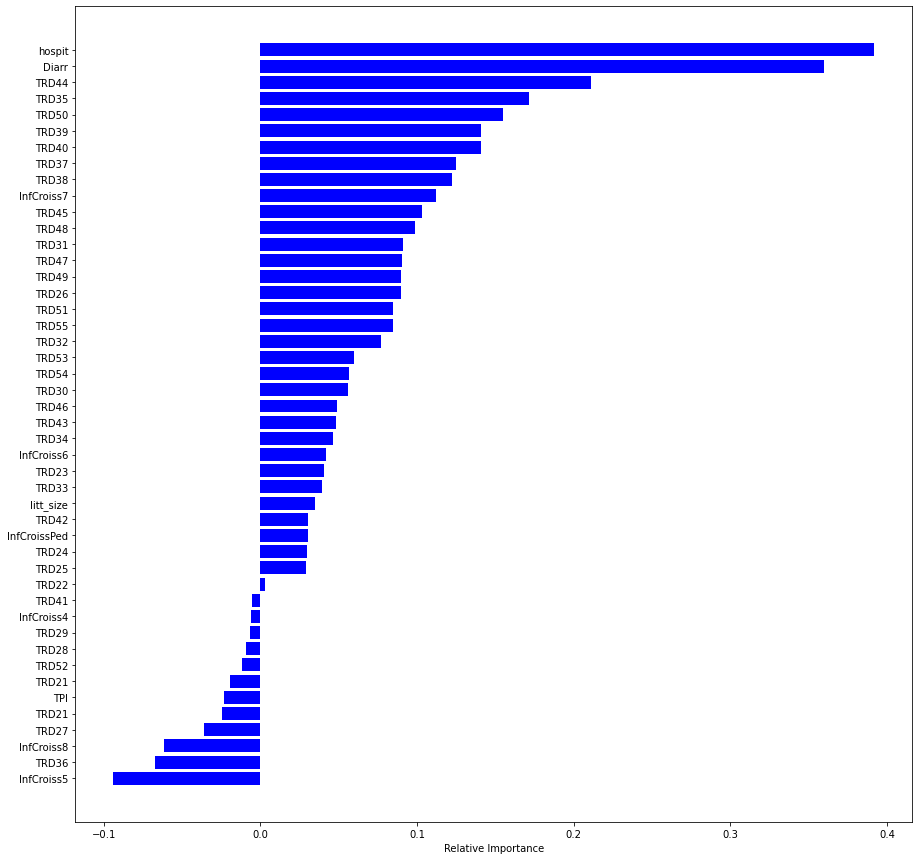

In [125]:
import matplotlib.pyplot as plt

names=['litt_size','TPI','Diarr','hospit','InfCroissPed', 'InfCroiss4', 'InfCroiss5', 'InfCroiss6', 'InfCroiss7', 'InfCroiss8', 'TRD21', 'TRD22', 'TRD23', 'TRD24', 'TRD25', 'TRD26', 'TRD27', 'TRD28', 'TRD29', 'TRD30', 'TRD31', 'TRD32', 'TRD33', 'TRD34', 'TRD35', 'TRD36', 'TRD37', 'TRD38', 'TRD39', 'TRD40', 'TRD41', 'TRD42', 'TRD43', 'TRD21', 'TRD44', 'TRD45', 'TRD46', 'TRD47', 'TRD48', 'TRD49', 'TRD50', 'TRD51', 'TRD52', 'TRD53', 'TRD54', 'TRD55', 'TRD56']

#Plotting horizontal bar graph
plt.figure(figsize=(15,15))
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [126]:
for i in range(0,len(X.columns)):
    for j in  range(0,len(X.columns)):
        if i!=j:
            corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
            if corr_1>0.30:
                print( X.columns[i] , " is highly  correlated  with ", X.columns[j])

Diarr  is highly  correlated  with  hospit
hospit  is highly  correlated  with  Diarr
hospit  is highly  correlated  with  TRD32
InfCroissPed  is highly  correlated  with  InfCroiss4
InfCroissPed  is highly  correlated  with  InfCroiss5
InfCroissPed  is highly  correlated  with  InfCroiss6
InfCroissPed  is highly  correlated  with  InfCroiss7
InfCroissPed  is highly  correlated  with  InfCroiss8
InfCroiss4  is highly  correlated  with  InfCroissPed
InfCroiss5  is highly  correlated  with  InfCroissPed
InfCroiss6  is highly  correlated  with  InfCroissPed
InfCroiss7  is highly  correlated  with  InfCroissPed
InfCroiss8  is highly  correlated  with  InfCroissPed
TRD21  is highly  correlated  with  TRD22
TRD21  is highly  correlated  with  TRD24
TRD22  is highly  correlated  with  TRD21
TRD22  is highly  correlated  with  TRD23
TRD22  is highly  correlated  with  TRD24
TRD22  is highly  correlated  with  TRD27
TRD22  is highly  correlated  with  TRD28
TRD22  is highly  correlated  with  T

In [127]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, Y);

<AxesSubplot:>

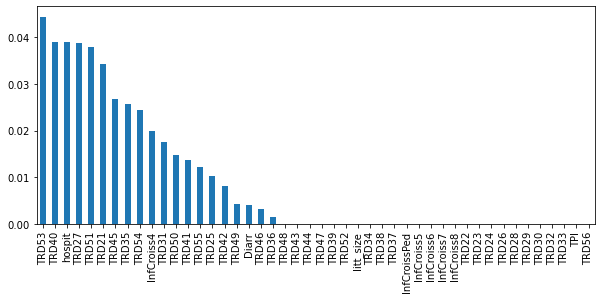

In [128]:
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

## Données Diarrhée

In [149]:
data = pd.read_csv(r"DataD.csv")
data.fillna(0, inplace=True)
del data['ID']
del data['ID_litter']
del data['group']
del data['IgGJ2']
del data['AgeD2']
del data['Age_D1']
del data['Min1inflcr']
del data['sex']
del data['Size']
data.head()

,litt_size,TPI,Died,hospit,InfCroissPed,InfCroiss4,InfCroiss5,InfCroiss6,InfCroiss7,InfCroiss8,...,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56,Diarr
0,5,0.0,1,1,0.0,1,0,0,0.0,0.0,...,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,0.0,1
1,5,0.0,0,0,0.0,1,0,0,0.0,0.0,...,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3,1
2,5,0.0,0,0,0.0,0,1,0,0.0,0.0,...,38.2,38.4,38.1,38.8,39.1,37.4,38.0,38.2,37.6,0
3,5,0.0,0,1,0.0,0,1,0,0.0,0.0,...,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,0.0,1
4,5,0.0,0,1,1.0,0,1,0,0.0,1.0,...,38.3,38.7,38.6,39.1,37.4,0.0,0.0,0.0,0.0,1


In [150]:
X = data.iloc[:,0:46]
Y = data['Diarr']
X.head()

,litt_size,TPI,Died,hospit,InfCroissPed,InfCroiss4,InfCroiss5,InfCroiss6,InfCroiss7,InfCroiss8,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,5,0.0,1,1,0.0,1,0,0,0.0,0.0,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,0.0
1,5,0.0,0,0,0.0,1,0,0,0.0,0.0,...,38.2,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3
2,5,0.0,0,0,0.0,0,1,0,0.0,0.0,...,38.5,38.2,38.4,38.1,38.8,39.1,37.4,38.0,38.2,37.6
3,5,0.0,0,1,0.0,0,1,0,0.0,0.0,...,37.8,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,0.0
4,5,0.0,0,1,1.0,0,1,0,0.0,1.0,...,38.3,38.3,38.7,38.6,39.1,37.4,0.0,0.0,0.0,0.0


In [151]:
full_data= X.copy()
full_data["Diarr"]= Y
print(full_data.head(2))

   litt_size  TPI  Died  hospit  InfCroissPed  InfCroiss4  InfCroiss5  \
0          5  0.0     1       1           0.0           1           0   
1          5  0.0     0       0           0.0           1           0   

   InfCroiss6  InfCroiss7  InfCroiss8  ...  TRD48  TRD49  TRD50  TRD51  TRD52  \
0           0         0.0         0.0  ...   38.4   38.2   38.4   38.9   38.7   
1           0         0.0         0.0  ...   38.4   37.4   37.8   39.1   38.1   

   TRD53  TRD54  TRD55  TRD56  Diarr  
0   38.5   38.7   39.0    0.0      1  
1   38.7   37.7   37.9   38.3      1  

[2 rows x 47 columns]


In [152]:
imp = full_data.drop("Diarr", axis=1).apply(lambda x: x.corr(full_data.Diarr))
print(imp)
indices = np.argsort(imp)
print(indices)
print(imp[indices])

litt_size       0.070365
TPI            -0.019676
Died            0.359767
hospit          0.681580
InfCroissPed    0.077421
InfCroiss4      0.074679
InfCroiss5      0.047442
InfCroiss6      0.032383
InfCroiss7      0.138971
InfCroiss8      0.161556
TRD21           0.050178
TRD22           0.087033
TRD23           0.083809
TRD24          -0.011262
TRD25          -0.036904
TRD26           0.128896
TRD27          -0.096808
TRD28           0.030047
TRD29          -0.023812
TRD30           0.005132
TRD31           0.106330
TRD32           0.122219
TRD33          -0.138211
TRD34          -0.021536
TRD35          -0.095556
TRD36           0.051516
TRD37          -0.023785
TRD38          -0.016325
TRD39          -0.026717
TRD40          -0.147048
TRD41          -0.087185
TRD42           0.068821
TRD43          -0.034655
TRD44          -0.197492
TRD45          -0.150956
TRD46          -0.162677
TRD47          -0.151055
TRD48          -0.170487
TRD49          -0.135357
TRD50          -0.151259


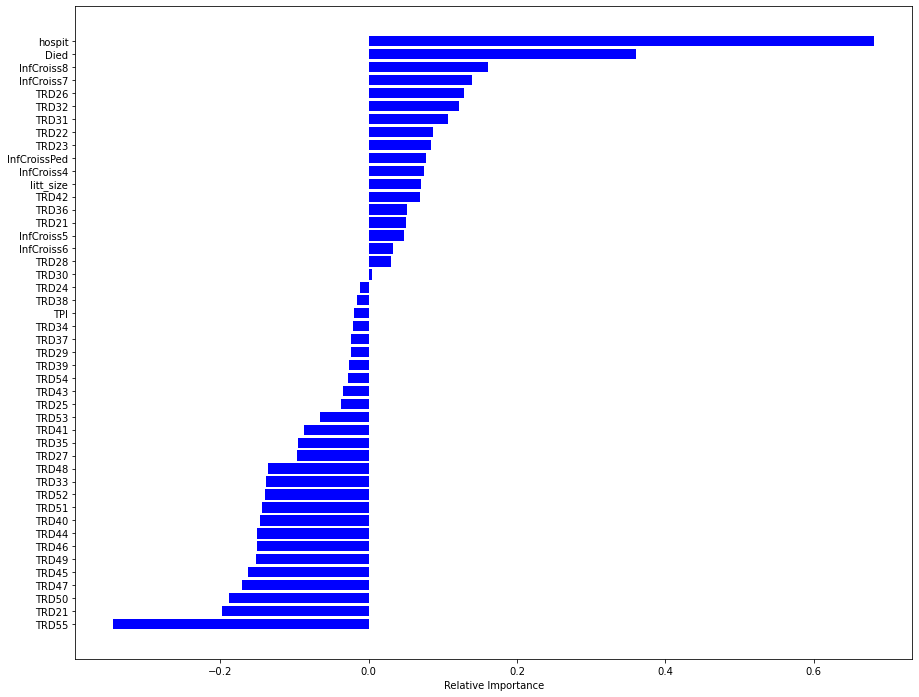

In [153]:
import matplotlib.pyplot as plt

names=['litt_size','TPI','Died','hospit','InfCroissPed', 'InfCroiss4', 'InfCroiss5', 'InfCroiss6', 'InfCroiss7', 'InfCroiss8', 'TRD21', 'TRD22', 'TRD23', 'TRD24', 'TRD25', 'TRD26', 'TRD27', 'TRD28', 'TRD29', 'TRD30', 'TRD31', 'TRD32', 'TRD33', 'TRD34', 'TRD35', 'TRD36', 'TRD37', 'TRD38', 'TRD39', 'TRD40', 'TRD41', 'TRD42', 'TRD43', 'TRD21', 'TRD44', 'TRD45', 'TRD46', 'TRD47', 'TRD48', 'TRD49', 'TRD50', 'TRD51', 'TRD52', 'TRD53', 'TRD54', 'TRD55', 'TRD56']

#Plotting horizontal bar graph
plt.figure(figsize=(15,12))
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


<AxesSubplot:>

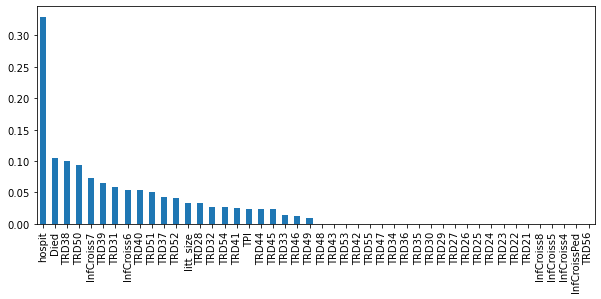

In [154]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, Y);
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

## Test pour l'hospitalisation 

In [155]:
data = pd.read_csv(r"DataH.csv")
data.fillna(0, inplace=True)
del data['ID']
del data['ID_litter']
del data['group']
del data['IgGJ2']
del data['AgeD2']
del data['Age_D1']
del data['Min1inflcr']
del data['sex']
del data['Size']
data.head()

,litt_size,TPI,Died,Diarr,InfCroissPed,InfCroiss4,InfCroiss5,InfCroiss6,InfCroiss7,InfCroiss8,...,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56,hospit
0,5,0.0,1,1,0.0,1,0,0,0.0,0.0,...,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,0.0,1
1,5,0.0,0,1,0.0,1,0,0,0.0,0.0,...,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3,0
2,5,0.0,0,0,0.0,0,1,0,0.0,0.0,...,38.2,38.4,38.1,38.8,39.1,37.4,38.0,38.2,37.6,0
3,5,0.0,0,1,0.0,0,1,0,0.0,0.0,...,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,0.0,1
4,5,0.0,0,1,1.0,0,1,0,0.0,1.0,...,38.3,38.7,38.6,39.1,37.4,0.0,0.0,0.0,0.0,1


In [156]:
X = data.iloc[:,0:46]
Y = data['hospit']
X.head()

,litt_size,TPI,Died,Diarr,InfCroissPed,InfCroiss4,InfCroiss5,InfCroiss6,InfCroiss7,InfCroiss8,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,5,0.0,1,1,0.0,1,0,0,0.0,0.0,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,0.0
1,5,0.0,0,1,0.0,1,0,0,0.0,0.0,...,38.2,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3
2,5,0.0,0,0,0.0,0,1,0,0.0,0.0,...,38.5,38.2,38.4,38.1,38.8,39.1,37.4,38.0,38.2,37.6
3,5,0.0,0,1,0.0,0,1,0,0.0,0.0,...,37.8,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,0.0
4,5,0.0,0,1,1.0,0,1,0,0.0,1.0,...,38.3,38.3,38.7,38.6,39.1,37.4,0.0,0.0,0.0,0.0


In [157]:
full_data= X.copy()
full_data["hospit"]= Y
print(full_data.head(2))

   litt_size  TPI  Died  Diarr  InfCroissPed  InfCroiss4  InfCroiss5  \
0          5  0.0     1      1           0.0           1           0   
1          5  0.0     0      1           0.0           1           0   

   InfCroiss6  InfCroiss7  InfCroiss8  ...  TRD48  TRD49  TRD50  TRD51  TRD52  \
0           0         0.0         0.0  ...   38.4   38.2   38.4   38.9   38.7   
1           0         0.0         0.0  ...   38.4   37.4   37.8   39.1   38.1   

   TRD53  TRD54  TRD55  TRD56  hospit  
0   38.5   38.7   39.0    0.0       1  
1   38.7   37.7   37.9   38.3       0  

[2 rows x 47 columns]


In [158]:
imp = full_data.drop("hospit", axis=1).apply(lambda x: x.corr(full_data.hospit))
print(imp)
indices = np.argsort(imp)
print(indices)
print(imp[indices])

litt_size       0.078398
TPI             0.052771
Died            0.391818
Diarr           0.681580
InfCroissPed    0.170418
InfCroiss4     -0.005977
InfCroiss5      0.025853
InfCroiss6      0.158991
InfCroiss7      0.167710
InfCroiss8      0.093310
TRD21           0.057301
TRD22           0.080845
TRD23           0.070057
TRD24           0.216089
TRD25          -0.040463
TRD26           0.108422
TRD27           0.060269
TRD28           0.223056
TRD29           0.197630
TRD30           0.138284
TRD31           0.298516
TRD32           0.300551
TRD33          -0.039812
TRD34          -0.038337
TRD35          -0.103889
TRD36           0.064499
TRD37           0.078572
TRD38          -0.032863
TRD39          -0.156157
TRD40          -0.117559
TRD41          -0.207909
TRD42           0.121763
TRD43          -0.073207
TRD44          -0.252675
TRD45          -0.199326
TRD46          -0.205107
TRD47          -0.202570
TRD48          -0.220795
TRD49          -0.176727
TRD50          -0.186212


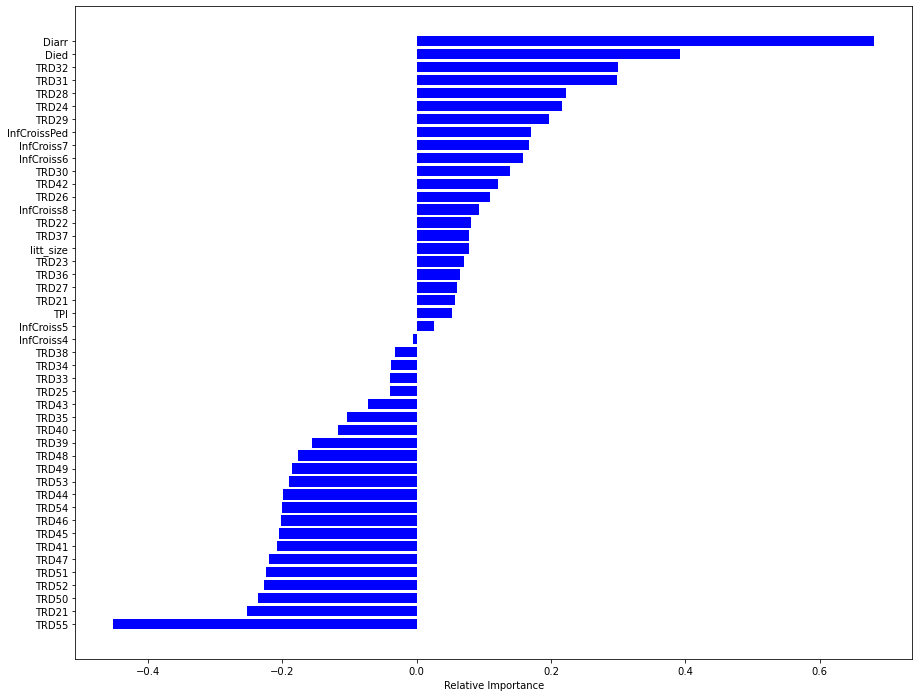

In [159]:
import matplotlib.pyplot as plt

names=['litt_size','TPI','Died','Diarr','InfCroissPed', 'InfCroiss4', 'InfCroiss5', 'InfCroiss6', 'InfCroiss7', 'InfCroiss8', 'TRD21', 'TRD22', 'TRD23', 'TRD24', 'TRD25', 'TRD26', 'TRD27', 'TRD28', 'TRD29', 'TRD30', 'TRD31', 'TRD32', 'TRD33', 'TRD34', 'TRD35', 'TRD36', 'TRD37', 'TRD38', 'TRD39', 'TRD40', 'TRD41', 'TRD42', 'TRD43', 'TRD21', 'TRD44', 'TRD45', 'TRD46', 'TRD47', 'TRD48', 'TRD49', 'TRD50', 'TRD51', 'TRD52', 'TRD53', 'TRD54', 'TRD55', 'TRD56']

#Plotting horizontal bar graph
plt.figure(figsize=(15,12))
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


<AxesSubplot:>

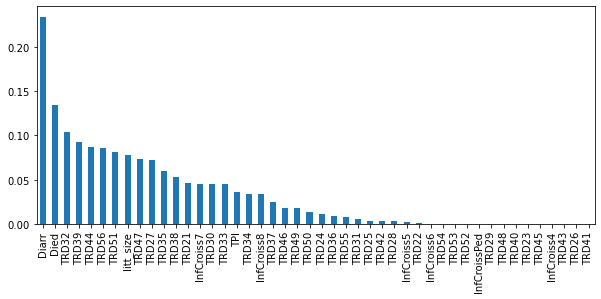

In [160]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, Y);
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))